**Installing Transformers Library**





In [1]:
!pip install -q transformers

**Installing YouTube Transcript API Library**








In [2]:
!pip install -q youtube_transcript_api

**Creating a Pipeline for YouTube Transcript Analysis**

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


**YouTube Video Link Declaration**








In [4]:
youtube_video = "https://www.youtube.com/watch?v=lRYDRSygx7Y"

**Extracting YouTube Video ID**








In [5]:
video_id = youtube_video.split("=")[1]

In [6]:
video_id

'lRYDRSygx7Y'

**Embedding YouTube Video Using IPython Display**

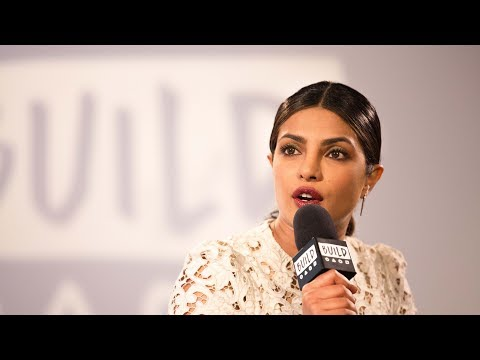

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

**Retrieving YouTube Video Transcripts Using YouTubeTranscriptApi**

In [8]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


**Extracting Transcript Segments**

In [9]:
transcript[0:5]

[{'text': 'i have to be very honest that when i was',
  'start': 0.08,
  'duration': 4.8},
 {'text': '17 and 18 when i became respectively',
  'start': 2.32,
  'duration': 4.559},
 {'text': 'when i became miss india in miss world',
  'start': 4.88,
  'duration': 4.0},
 {'text': 'it was the beginning of', 'start': 6.879, 'duration': 3.84},
 {'text': 'me even entertaining the idea of show',
  'start': 8.88,
  'duration': 4.0}]

**Concatenating Transcripts and Calculating Length**

In [10]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

2757


**Initializing Summarization Pipeline**

In [11]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

**Text Summarization Loop with Iterative Processing**

In [12]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("INPUT TEXT: \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("SUMMARIZED TEXT: \n"+out)
  summarized_text.append(out)

INPUT TEXT: 
 i have to be very honest that when i was 17 and 18 when i became respectively when i became miss india in miss world it was the beginning of me even entertaining the idea of show business in my head because i wanted to be an engineer i was a physics math student i wanted to be an aeronautical engineer i wanted to build planes i wanted to be in nasa i come from an extremely academic family no one in my wildest dreams in my family had imagined show business as a career my grandmother in fact still asked me until about 10 years ago what do you do [Laughter] she said i'm an actor yeah yeah but what do you like what's yours yeah trust an indian grandmother to ask you that but um so what changed with me when i when when i became miss world which happened in london actually it gave me a sense of self i when i was a teenager i had a lot of self-esteem issues like most teenagers do you know you don't know what's happening with you you don't know what your body is going through you

**Calculating Length of Summarized Text**

In [13]:
len(str(summarized_text))

1087

**Summarized Text as String**

In [14]:
str(summarized_text)

'[" When i was a teenager i had a lot of self-esteem issues like most teenagers do you know you don\'t know what\'s happening with you . When i became miss india in miss world it was the beginning of me even entertaining the idea of show business in my head because i wanted to be an engineer .", " At 15 it got really hard for me when i decided to go back to india and i went back home and i feel like destiny played its game . My mum randomly sent photos without telling me to miss india i didn\'t know i just thought that they called me because i was discovered yeah teenage egos [Laughter]", " i\'ve been raised to be an opinionated girl my parents always told me if you have an opinion don\'t be afraid to share it and that\'s all i did . i didn\'t know how to walk on heels i tripped on my sari backstage five times and then i was in velvet pants with boots with boots on . i knew it would happen to me on stage i still have ptsd about it but but i\'m just saying like it it gave me a sense of 